# **Clusterização**

## Importando bibliotecas:

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn import cluster as ct
from sklearn import metrics as mt
from matplotlib import pyplot as plt

## Carregando os dados:

In [2]:
X = pd.read_csv('../X_dataset.csv')

## Funções:

In [3]:
def error(model_name, y, yhat, c):
    ss_avg = mt.silhouette_score(y, yhat)
    n_clusters = c  
    return pd.DataFrame({'Model Name': model_name,
                         'Clusters': n_clusters,
                         'Silhouette Score': ss_avg}, index=[1]).round(3)

# **1.0 K-Means**

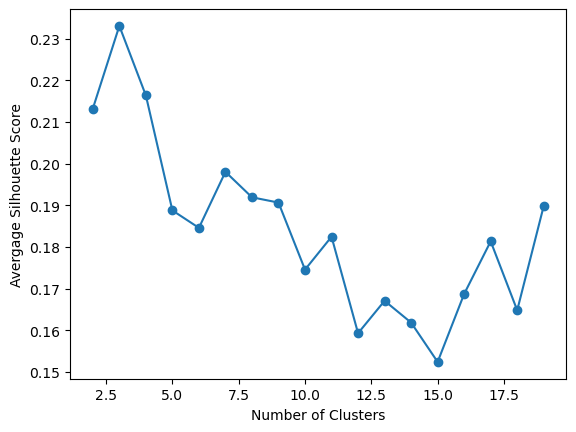

In [8]:
clusters = np.arange( 2, 20, 1 )
ss_list = []

for c in clusters:
    kmeans = ct.KMeans(n_clusters=c, random_state=0)
    labels = kmeans.fit_predict(X)  
    ss_avg = mt.silhouette_score(X, labels)
    ss_list.append(ss_avg)

plt.plot(clusters, ss_list, marker='o');

In [41]:
kmeans = ct.KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X)  

kmeans_error = error('KMeans', X, labels, 3)
kmeans_error

,Model Name,Clusters,Silhouette Score
1,KMeans,3,0.233


# **2.0 Affinity Propagation**

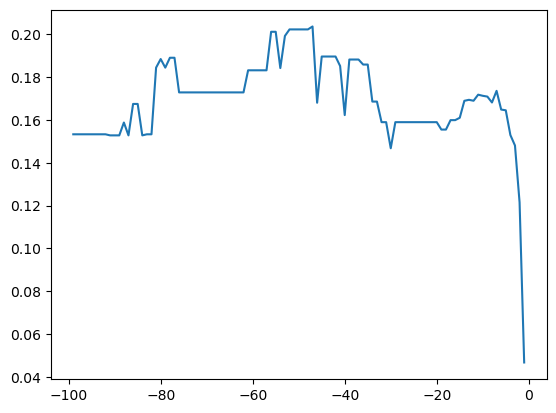

In [46]:
p = np.arange(-1, -100, -1)
ss_list = []

for i in p:
    aff = ct.AffinityPropagation(preference=i, random_state=0)
    aff.fit(X)
    labels = aff.predict(X)
    ss = mt.silhouette_score(X, labels)
    ss_list.append(ss)

plt.plot(p, ss_list);

In [47]:
p_best = ss_list.index(max(ss_list))
p_best

46

In [59]:
aff = ct.AffinityPropagation(preference=p[p_best], random_state=0)
aff.fit(X)
labels = aff.predict(X)

c = len(np.unique(labels))

aff_error = error('Affinity Propagation', X, labels, c)
aff_error

,Model Name,Clusters,Silhouette Score
1,Affinity Propagation,7,0.204


# **Clusterização - Resultado final:**

In [50]:
result = pd.concat([kmeans_error, aff_error], ignore_index=True).round(3)
result

,Model Name,Clusters,Silhouette Score
0,KMeans,3,0.233
1,Affinity Propagation,7,0.204
